# Lab 4: Mini Project 2

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV, KFold

dat = pd.read_csv('winequality-red.csv')

dat.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Wow, what's going on? (CSV actually separated by ;)

In [93]:
dat = pd.read_csv('winequality-red.csv', sep = ';')

dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let's explore our data

In [94]:
dat.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [95]:
pd.set_option('display.max_columns', None)

dat.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [96]:
dat.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


If we want to estimate a k-nn and based on the predictors available, should we normalize? Yes.

In [97]:
#Let's normalize our  X
x = dat.drop(['quality'], axis = 1)
x_norm = pd.DataFrame(preprocessing.scale(x))
x_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,3.836136e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [98]:
x_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [99]:
# We just made wine quality binary: good if quality > 6; bad otherwise
y = dat['quality']
q = pd.DataFrame(np.where(y > 6, 1, 0)).squeeze()

In [100]:
#Assign to train and test 
x_norm_train = x_norm.head(800)
q_train = q.head(800)
x_norm_test = x_norm.tail(799)
q_test = q.tail(799)

### K-NN, where K=1

In [101]:
# Now we try k-NN with k = 1
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(x_norm_train, q_train)
q_pred_knn1 = knn_1.predict(x_norm_test)
accuracy_score(q_test, q_pred_knn1)

0.8035043804755945

In [102]:
cm_knn1 = confusion_matrix(q_test, q_pred_knn1, normalize = 'true')
print(cm_knn1)
print(confusion_matrix(q_test, q_pred_knn1))

[[0.89140271 0.10859729]
 [0.625      0.375     ]]
[[591  72]
 [ 85  51]]


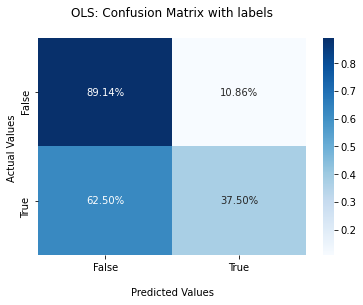

In [103]:
ax = sns.heatmap(cm_knn1, annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('OLS: Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### K-NN, where K=11

In [104]:
knn_11 = KNeighborsClassifier(n_neighbors = 11)
knn_11.fit(x_norm_train, q_train)
q_pred_knn11 = knn_11.predict(x_norm_test)
accuracy_score(q_test, q_pred_knn11)

0.8548185231539425

In [105]:
cm_knn11 = confusion_matrix(q_test, q_pred_knn11, normalize = 'true')
print(confusion_matrix(q_test, q_pred_knn11))

[[649  14]
 [102  34]]


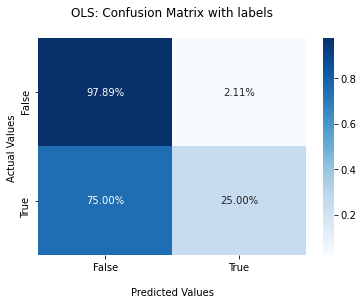

In [106]:
ax = sns.heatmap(cm_knn11, annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('OLS: Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### K - NN, where we want to find optimal i

In [107]:
# Now we try finding the k that yields the lowest classification
# error rate with the first 800 as training set

def odd(n):
    return list(range(1, 2*n, 2))

ks = odd(400)
print(ks)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413, 415, 417, 419, 421,

In [108]:
ac_rate = []
for i in ks:
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(x_norm_train, q_train)
     pred_i = knn.predict(x_norm_test)
     ac_rate.append(np.mean(pred_i == q_test))

max_value = max(ac_rate)

print(max_value)

0.8560700876095119


In [109]:
# Looks like the best classification error we can get is around 14%
opt_k = ac_rate.index(max_value)

print(opt_k)

4


### Let's try cross-validation

In [110]:
# We now try 5-fold cross-validation to estimate optimal k 

knni = KNeighborsClassifier()
para = {'n_neighbors':ks}
knn_cv = GridSearchCV(knni, para, cv = KFold(5, random_state=40, shuffle=True))
knn_cv.fit(x_norm, q)
print(knn_cv.best_params_)
print(knn_cv.best_score_)


{'n_neighbors': 1}
0.8911814263322885


In [111]:
# Apparently, k = 1 is best. Let's redefine good wine as wine with
# quality strictly greater than 4

q2 = pd.DataFrame(np.where(y > 4, 1, 0)).squeeze()

knn_cv.fit(x_norm, q2)
knn_cv.best_params_
# With the new definition of good wine, optimal k is 19
knn_cv.best_score_

0.9606073667711599

### Let's change the cost-function

In [112]:
# We now manipulate the cost function. Say we only care about 
# classifying bad wine as good wine 

c10 = []
for i in ks:
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(x_norm_train, q_train)
     pred_i = knn.predict(x_norm_test)
     c10.append(sum(pred_i - q_test > 0))

cost = np.ndarray.tolist(np.array(c10))

min_value = min(cost)

opt_k2 = cost.index(min_value)

print(opt_k2)

23
